In [1]:
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
import matplotlib.pyplot as plt


(a)

In [5]:
(x_train, y_train), (x_test, y_test) = tfk.datasets.cifar10.load_data()


In [7]:
X = np.vstack((x_train,x_test))
y = np.vstack((y_train,y_test))
y = y.flatten()

(b)

In [8]:
# find out which label has class = bird
ind = [i for i,j in enumerate(y) if j == 2]

In [9]:
X_bird = X[ind]
y_bird = y[ind]

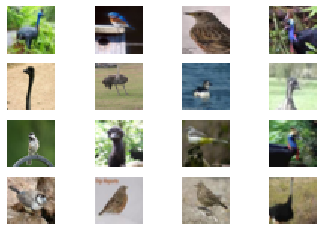

In [12]:
#show some image of bird class
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_bird[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

(c)

In [14]:
# flatten the data of X_bird
X_bird = X_bird.reshape((6144000,3))

(d)

In [15]:
from sklearn.cluster import KMeans

In [16]:
colors=4
kMeansModel = KMeans(n_clusters=colors)
kMeansModel = kMeansModel.fit(X_bird)
mainColors = kMeansModel.cluster_centers_
print('RGB of', colors, 'Main Colors:')
print(mainColors)

RGB of 4 Main Colors:
[[109.65059239 109.27831673  83.28993707]
 [206.98099383 212.26496739 211.9971915 ]
 [ 49.47406188  50.44531515  38.87600957]
 [156.81440864 156.17207932 136.44774851]]


In [45]:
X_new = X_bird
for i in range(len(X_bird)):
    X_new[i] = mainColors[kMeansModel.labels_[i]]

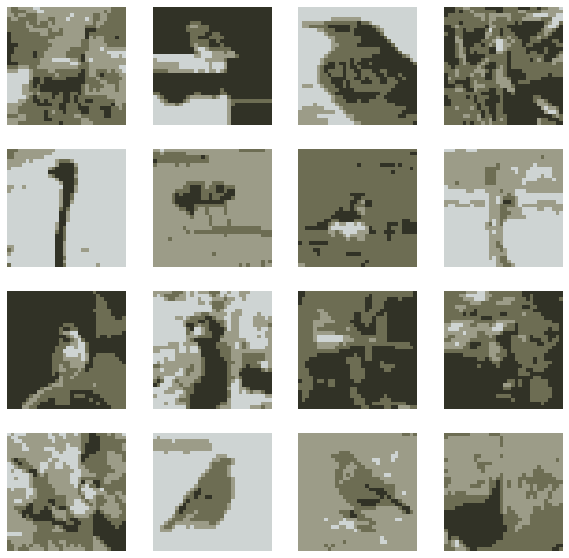

In [48]:
#show some of the result
X_viz = X_new.reshape((6000,32,32,3))
fig = plt.figure(figsize=(10,10))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

(e)

In [91]:
from skimage.color import rgb2grey
X_temp = X_bird.reshape((6000,32,32,3))
X_N = []
for i in range(len(X_temp)):
    X_N.append(rgb2grey(X_temp[i]).tolist())
    
X_N = np.array(X_N).reshape((6000,32,32,1))
    

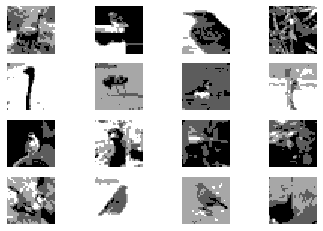

In [56]:
#print some grey images
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

(f)

In [61]:
#one-hot for y
y_N = tf.keras.utils.to_categorical(kMeansModel.labels_).reshape((6000,32,32,4))

In [92]:
X_N.shape

(6000, 32, 32, 1)

In [126]:
# train & test split
X_train = X_N[0:5900]
y_train = y_N[0:5900]
X_test = X_N[-100:]
y_test = y_N[-100:]

In [103]:

import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense



cnn = keras.models.Sequential()
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Dense(32, activation='softmax'))
cnn.add(Dense(4, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
________________________________________________

In [127]:
#compile 
cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
#run model
history = cnn.fit(X_train, y_train, epochs=30, validation_split=0.1)

Train on 5310 samples, validate on 590 samples
Epoch 1/30
5310/5310 [==============================] - 28s 5ms/step - loss: 0.8809 - accuracy: 0.5668 - val_loss: 0.8782 - val_accuracy: 0.5652
Epoch 2/30
5310/5310 [==============================] - 31s 6ms/step - loss: 0.8713 - accuracy: 0.5684 - val_loss: 0.8689 - val_accuracy: 0.5669
Epoch 3/30
5310/5310 [==============================] - 30s 6ms/step - loss: 0.8624 - accuracy: 0.5700 - val_loss: 0.8602 - val_accuracy: 0.5693
Epoch 4/30
5310/5310 [==============================] - 31s 6ms/step - loss: 0.8540 - accuracy: 0.5717 - val_loss: 0.8521 - val_accuracy: 0.5706
Epoch 5/30
5310/5310 [==============================] - 31s 6ms/step - loss: 0.8460 - accuracy: 0.5733 - val_loss: 0.8444 - val_accuracy: 0.5714
Epoch 6/30
5310/5310 [==============================] - 32s 6ms/step - loss: 0.8385 - accuracy: 0.5750 - val_loss: 0.8370 - val_accuracy: 0.5736
Epoch 7/30
5310/5310 [==============================] - 30s 6ms/step - loss: 0.8313

In [128]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

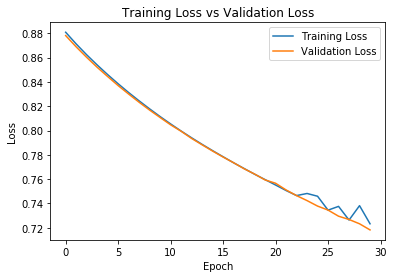

In [129]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [130]:
predictions = cnn.predict(X_test)

In [140]:
cnn.predict(X_test[:1]).shape

(1, 32, 32, 4)

In [139]:
X_test[0].shape

(32, 32, 1)

In [131]:
predictions.shape

(100, 32, 32, 4)

In [119]:
X_N.shape

(6000, 32, 32, 1)

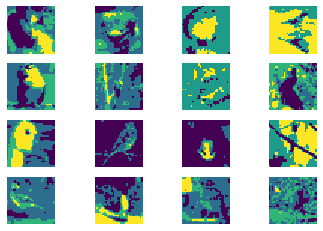

In [142]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(100,32,32)[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [151]:
predictions = predictions.reshape((102400,4))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kMeansModel.cluster_centers_[np.argmax(predictions[i])].tolist()

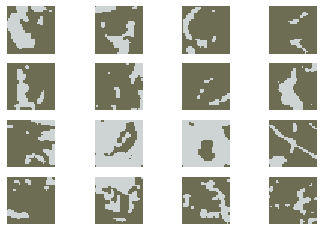

In [152]:
pred = pred.reshape((100,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow(np.array(arr,np.int32))
    plt.axis('off')
plt.show()